In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc
import pickle

import warnings
warnings.filterwarnings("ignore")

We are loading the preprocessed data from EDA & Feature Engineering from phase 2 for both train and test sets respectively

In [3]:
data_path='C:/Users/ganesh.chandra/Proj 87- Determinig items for shortage prior occurence- Inventory Mgmt/preprocessed_train.csv'

train = pd.read_csv('preprocessed_train.csv')
train.head(10)

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,binary_pieces_past_due,binary_local_bo_qty
0,0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
1,1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
2,2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
3,3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.13,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
4,4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
5,5,1044198,13.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.87,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
6,6,1044643,1095.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
7,7,1045098,6.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.228435,0.993169,0.119723,0.957397,0.992876,0,0,0
8,8,1045815,140.0,7.872267,0.0,15.0,114.0,152.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
9,9,1045867,4.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.87,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0


In [4]:
data_path = 'C:/Users/ganesh.chandra/Proj 87- Determinig items for shortage prior occurence- Inventory Mgmt/preprocessed_test.csv'
test = pd.read_csv('preprocessed_test.csv')

In [100]:
test.head(10)

,Unnamed: 0,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,binary_pieces_past_due,binary_local_bo_qty
0,0,62.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
1,1,9.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.119723,0.035912,0.992876,0,0,0
2,2,17.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.95,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
3,3,9.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.0,0.764874,0.993169,0.119723,0.957397,0.992876,0,0,0
4,4,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.71,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
5,5,15.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.68,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
6,6,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
7,7,28.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
8,8,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.119723,0.957397,0.992876,0,0,0
9,9,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0


Dropping categorical objects from train and test set created via pre-processed data

In [5]:
train.drop('Unnamed: 0', axis=1, inplace=True)
train.drop('sku', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,binary_pieces_past_due,binary_local_bo_qty
0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.99,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
2,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.13,0.0,0.764874,0.993169,0.873587,0.957397,0.992876,0,0,0
4,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,-99.00,0.0,0.228435,0.993169,0.873587,0.957397,0.992876,0,0,0


In [6]:
y_train = train['went_on_backorder']
x_train = train.drop('went_on_backorder', axis=1)
y_test = test['went_on_backorder']
x_test = test.drop('went_on_backorder', axis=1)

print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (152599, 23)
y_train: (152599,)
x_test: (242075, 23)
y_test: (242075,)


# Modeling & Performance Analysis

# Logistic Regression


In [24]:
robust_scaler = RobustScaler()
x_train_scaled = robust_scaler.fit_transform(x_train)
x_test_scaled = robust_scaler.transform(x_test)
logistic_regression = SGDClassifier(loss='log', class_weight='balanced', n_jobs=-1)
params = {'eta0': [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7], 'penalty': ['l1', 'l2']}

In [25]:
logist_grid_search = GridSearchCV(logistic_regression, params, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)

In [26]:
y_train=y_train.astype('int')
x_train=x_train.astype('int')
y_train=y_train.astype('int')
x_test=x_test.astype('int')
y_test=y_test.astype('int')

In [27]:
logist_grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(class_weight='balanced', loss='log',
                                     n_jobs=-1),
             n_jobs=-1,
             param_grid={'eta0': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                  1e-07],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [28]:
best_eta0 = logist_grid_search.best_estimator_.eta0
best_penalty = logist_grid_search.best_estimator_.penalty
best_logist = SGDClassifier(loss='log', learning_rate='constant', eta0=best_eta0, penalty=best_penalty, class_weight='balanced', n_jobs=-1)
best_logist.fit(x_train_scaled, y_train)


SGDClassifier(class_weight='balanced', eta0=0.001, learning_rate='constant',
              loss='log', n_jobs=-1)

In [29]:
logist_y_pred_train = best_logist.predict(x_train_scaled)
logist_y_pred = best_logist.predict(x_test_scaled)
print('The accuracy score of the logistic regression model on train set is:', accuracy_score(y_train, logist_y_pred_train))
print('The accuracy score of the logistic regression model on test set is:', accuracy_score(y_test, logist_y_pred))

The accuracy score of the logistic regression model on train set is: 0.7567153126822588
The accuracy score of the logistic regression model on test set is: 0.7554724775379531


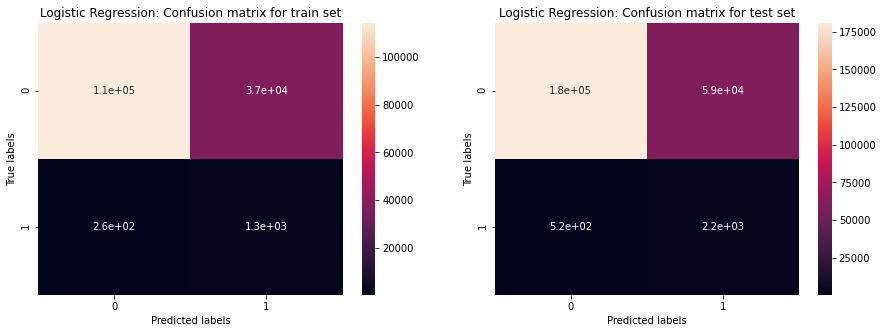

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, logist_y_pred_train), annot=True)
plt.title('Logistic Regression: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, logist_y_pred), annot=True)
plt.title('Logistic Regression: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [31]:
print('The precision score the best logistic regression model on train set is:', precision_score(y_train, logist_y_pred_train, average='macro'))
print('The precision score the best logistic regression model on test set is:', precision_score(y_test, logist_y_pred, average='macro'))
print('The recall score the best logistic regression model on train set is:', recall_score(y_train, logist_y_pred_train, average='macro'))
print('The recall score the best logistic regression model on test set is:', recall_score(y_test, logist_y_pred, average='macro'))
print('The AUC score the best logistic regression model on train set is:', roc_auc_score(y_train, logist_y_pred_train, average='macro'))
print('The AUC score the best logistic regression model on test set is:', roc_auc_score(y_test, logist_y_pred, average='macro'))

The precision score the best logistic regression model on train set is: 0.5154182265203859
The precision score the best logistic regression model on test set is: 0.51642352051959
The recall score the best logistic regression model on train set is: 0.7928488228873053
The recall score the best logistic regression model on test set is: 0.7814589880313347
The AUC score the best logistic regression model on train set is: 0.7928488228873054
The AUC score the best logistic regression model on test set is: 0.7814589880313348


# Descision Tree

In [32]:
cart = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
cart_grid_search = GridSearchCV(cart, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)
cart_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             return_train_score=True, scoring='roc_auc')

In [33]:
best_max_depth_cart = cart_grid_search.best_estimator_.max_depth
best_cart = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth_cart, class_weight='balanced')
best_cart.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [34]:
cart_y_pred_train = best_cart.predict(x_train)
cart_y_pred = best_cart.predict(x_test)
print('The accuracy score of the decision tree model on train set is:', accuracy_score(y_train, cart_y_pred_train))
print('The accuracy score of the decision tree model on test set is:', accuracy_score(y_test, cart_y_pred))

The accuracy score of the decision tree model on train set is: 0.8360277590285651
The accuracy score of the decision tree model on test set is: 0.8445399153155014


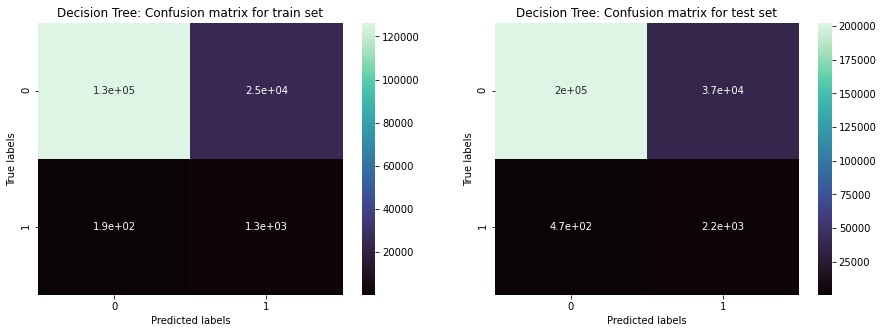

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, cart_y_pred_train), annot=True, cmap='mako')
plt.title('Decision Tree: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, cart_y_pred), annot=True, cmap='mako')
plt.title('Decision Tree: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
print('The precision score the best decision tree model on train set is:', precision_score(y_train, cart_y_pred_train, average='macro'))
print('The precision score the best decision tree model on test set is:', precision_score(y_test, cart_y_pred, average='macro'))
print('The recall score the best decision tree model on train set is:', recall_score(y_train, cart_y_pred_train, average='macro'))
print('The recall score the best decision tree model on test set is:', recall_score(y_test, cart_y_pred, average='macro'))
print('The AUC score the best decision tree model on train set is:', roc_auc_score(y_train, cart_y_pred_train, average='macro'))
print('The AUC score the best decision tree model on test set is:', roc_auc_score(y_test, cart_y_pred, average='macro'))

The precision score the best decision tree model on train set is: 0.5246219783672091
The precision score the best decision tree model on test set is: 0.526960235236999
The recall score the best decision tree model on train set is: 0.8543821131743112
The recall score the best decision tree model on test set is: 0.834401460969904
The AUC score the best decision tree model on train set is: 0.8543821131743111
The AUC score the best decision tree model on test set is: 0.834401460969904


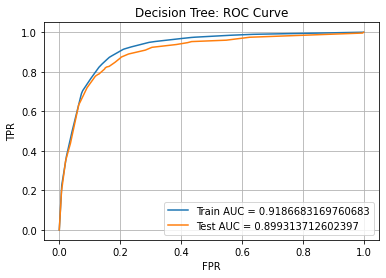

In [37]:
cart_y_train_pred = best_cart.predict_proba(x_train)[:,1]
cart_y_test_pred = best_cart.predict_proba(x_test)[:,1]

train_fpr_cart, train_tpr_cart, train_thresholds_cart = roc_curve(y_train, cart_y_train_pred)
test_fpr_cart, test_tpr_cart, test_thresholds_cart = roc_curve(y_test, cart_y_test_pred)

plt.plot(train_fpr_cart, train_tpr_cart, label="Train AUC ="+' '+str(auc(train_fpr_cart, train_tpr_cart)))
plt.plot(test_fpr_cart, test_tpr_cart, label="Test AUC ="+' '+str(auc(test_fpr_cart, test_tpr_cart)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Decision Tree: ROC Curve")
plt.grid()
plt.show()

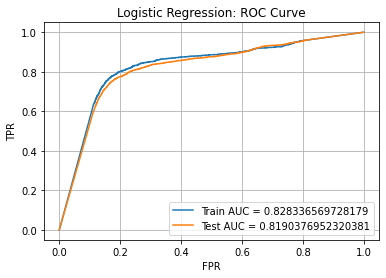

In [38]:
logist_y_train_pred = best_logist.predict_proba(x_train_scaled)[:,1]
logist_y_test_pred = best_logist.predict_proba(x_test_scaled)[:,1]
train_fpr_logist, train_tpr_logist, train_thresholds_logist = roc_curve(y_train, logist_y_train_pred)
test_fpr_logist, test_tpr_logist, test_thresholds_logist = roc_curve(y_test, logist_y_test_pred)

plt.plot(train_fpr_logist, train_tpr_logist, label="Train AUC ="+' '+str(auc(train_fpr_logist, train_tpr_logist)))
plt.plot(test_fpr_logist, test_tpr_logist, label="Test AUC ="+' '+str(auc(test_fpr_logist, test_tpr_logist)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression: ROC Curve")
plt.grid()
plt.show()

# Ensemble Model Implementation

# Random Forest

In [39]:
random_forest = RandomForestClassifier(criterion='gini', n_jobs=-1, class_weight='balanced_subsample')
params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100], 
          'max_depth':[None, 2, 5, 7, 9, 10, 12, 15, 17, 20, 30, 50]}
forest_random_search = RandomizedSearchCV(random_forest, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)
forest_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 5, 7, 9, 10, 12,
                                                      15, 17, 20, 30, 50],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 75,
                                                         100]},
                   return_train_score=True, scoring='roc_auc')

In [40]:
best_n_estimators_rf = forest_random_search.best_estimator_.n_estimators
best_max_depth_rf = forest_random_search.best_estimator_.max_depth
best_forest = RandomForestClassifier(criterion='gini', n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf, 
                                     class_weight='balanced_subsample', min_samples_leaf=10, min_samples_split=10, n_jobs=-1)
best_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=9,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=75, n_jobs=-1)

In [41]:
forest_y_pred_train = best_forest.predict(x_train)
forest_y_pred = best_forest.predict(x_test)
print('The accuracy score of the random forest model on train set is:', accuracy_score(y_train, forest_y_pred_train))
print('The accuracy score of the random forest model on test set is:', accuracy_score(y_test, forest_y_pred))

The accuracy score of the random forest model on train set is: 0.877187923905137
The accuracy score of the random forest model on test set is: 0.8838996178870185


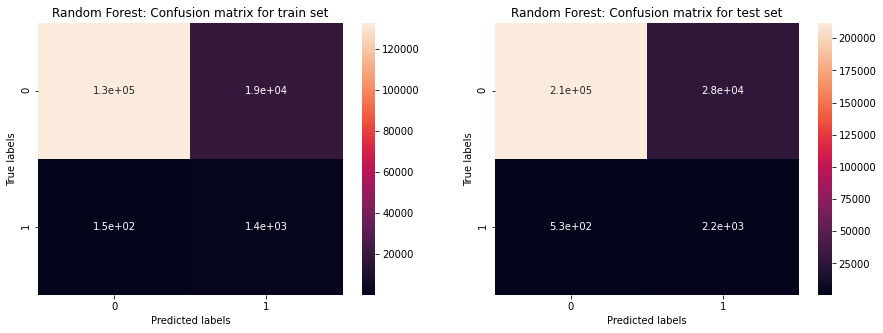

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, forest_y_pred_train), annot=True)
plt.title('Random Forest: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, forest_y_pred), annot=True)
plt.title('Random Forest: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [43]:
print('The precision score the best random forest model on train set is:', precision_score(y_train, forest_y_pred_train, average='macro'))
print('The precision score the best random forest model on test set is:', precision_score(y_test, forest_y_pred, average='macro'))
print('The recall score the best random forest model on train set is:', recall_score(y_train, forest_y_pred_train, average='macro'))
print('The recall score the best random forest model on test set is:', recall_score(y_test, forest_y_pred, average='macro'))
print('The AUC score the best random forest model on train set is:', roc_auc_score(y_train, forest_y_pred_train, average='macro'))
print('The AUC score the best random forest model on test set is:', roc_auc_score(y_test, forest_y_pred, average='macro'))

The precision score the best random forest model on train set is: 0.5337747933895862
The precision score the best random forest model on test set is: 0.5350750904546019
The recall score the best random forest model on train set is: 0.8891625152392642
The recall score the best random forest model on test set is: 0.844186512992411
The AUC score the best random forest model on train set is: 0.8891625152392642
The AUC score the best random forest model on test set is: 0.844186512992411


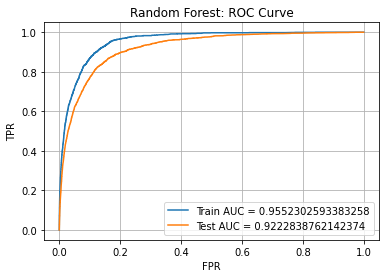

In [44]:
forest_y_train_pred = best_forest.predict_proba(x_train)[:,1]
forest_y_test_pred = best_forest.predict_proba(x_test)[:,1]
train_fpr_forest, train_tpr_forest, train_thresholds_forest = roc_curve(y_train, forest_y_train_pred)
test_fpr_forest, test_tpr_forest, test_thresholds_forest = roc_curve(y_test, forest_y_test_pred)
plt.plot(train_fpr_forest, train_tpr_forest, label="Train AUC ="+' '+str(auc(train_fpr_forest, train_tpr_forest)))
plt.plot(test_fpr_forest, test_tpr_forest, label="Test AUC ="+' '+str(auc(test_fpr_forest, test_tpr_forest)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Random Forest: ROC Curve")
plt.grid()
plt.show()

# Gradient Boosted Decision Tree


In [45]:
gbdt = XGBClassifier(learning_rate=1e-5, scale_pos_weight=148.0, n_jobs=-1)
params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100], 
          'max_depth':[2, 3, 5, 7, 9, 10, 12, 15, 17, 20, 30, 50]}
gbdt_random_search = RandomizedSearchCV(gbdt, params, cv=5, n_jobs=-1, scoring='roc_auc', return_train_score=True)
gbdt_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=1e-05, max_bin=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 9, 10, 12, 15,
                                                      17, 20, 30, 50],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 75,
                                                         100]},
                   return_train_score=True, scoring='roc_auc')

In [46]:
best_n_estimators_gbdt = gbdt_random_search.best_estimator_.n_estimators
best_max_depth_gbdt = gbdt_random_search.best_estimator_.max_depth
best_gbdt = XGBClassifier(n_estimators=best_n_estimators_gbdt, max_depth=best_max_depth_gbdt, learning_rate=1e-6,
                          reg_lambda=0.3, min_child_weight=0.10, subsample=0.6, colsample_bytree=0.7, n_jobs=-1)
best_gbdt.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1e-06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=0.1,
              missing=nan, monotone_constraints='()', n_estimators=25,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.3, ...)

In [47]:
gbdt_y_pred_train = best_gbdt.predict(x_train)
gbdt_y_pred = best_gbdt.predict(x_test)
print('The accuracy score of the gradient boosted decision tree model on train set is:', accuracy_score(y_train, gbdt_y_pred_train))
print('The accuracy score of the gradient boosted decision tree model on test set is:', accuracy_score(y_test, gbdt_y_pred))

The accuracy score of the gradient boosted decision tree model on train set is: 0.9900327000832246
The accuracy score of the gradient boosted decision tree model on test set is: 0.9888960033047609


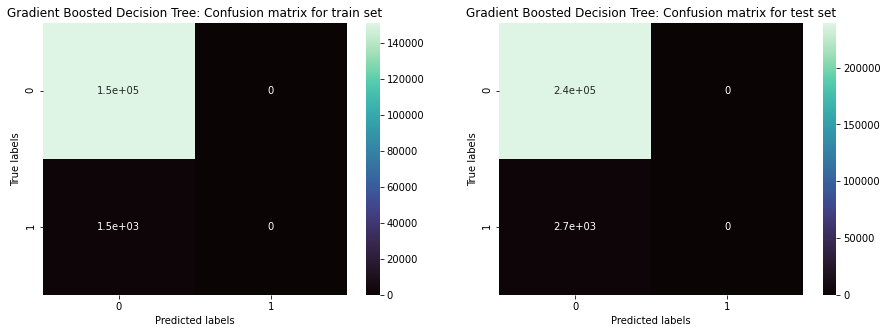

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, gbdt_y_pred_train), annot=True, cmap='mako')
plt.title('Gradient Boosted Decision Tree: Confusion matrix for train set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, gbdt_y_pred), annot=True, cmap='mako')
plt.title('Gradient Boosted Decision Tree: Confusion matrix for test set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [49]:
print('The precision score the best gradient boosted decision tree model on train set is:', precision_score(y_train, gbdt_y_pred_train, average='macro'))
print('The precision score the best gradient boosted decision tree model on test set is:', precision_score(y_test, gbdt_y_pred, average='macro'))
print('The recall score the best gradient boosted decision tree model on train set is:', recall_score(y_train, gbdt_y_pred_train, average='macro'))
print('The recall score the best gradient boosted decision tree model on test set is:', recall_score(y_test, gbdt_y_pred, average='macro'))
print('The AUC score the best gradient boosted decision tree model on train set is:', roc_auc_score(y_train, gbdt_y_pred_train, average='macro'))
print('The AUC score the best gradient boosted decision tree model on test set is:', roc_auc_score(y_test, gbdt_y_pred, average='macro'))

The precision score the best gradient boosted decision tree model on train set is: 0.4950163500416123
The precision score the best gradient boosted decision tree model on test set is: 0.49444800165238045
The recall score the best gradient boosted decision tree model on train set is: 0.5
The recall score the best gradient boosted decision tree model on test set is: 0.5
The AUC score the best gradient boosted decision tree model on train set is: 0.5
The AUC score the best gradient boosted decision tree model on test set is: 0.5


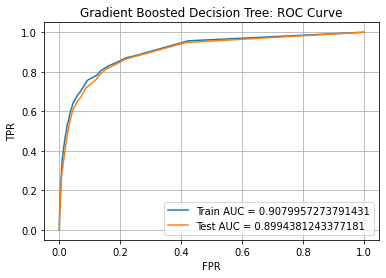

In [50]:
gbdt_y_train_pred = best_gbdt.predict_proba(x_train)[:,1]
gbdt_y_test_pred = best_gbdt.predict_proba(x_test)[:,1]
train_fpr_gbdt, train_tpr_gbdt, train_thresholds_gbdt = roc_curve(y_train, gbdt_y_train_pred)
test_fpr_gbdt, test_tpr_gbdt, test_thresholds_gbdt = roc_curve(y_test, gbdt_y_test_pred)
plt.plot(train_fpr_gbdt, train_tpr_gbdt, label="Train AUC ="+' '+str(auc(train_fpr_gbdt, train_tpr_gbdt)))
plt.plot(test_fpr_gbdt, test_tpr_gbdt, label="Test AUC ="+' '+str(auc(test_fpr_gbdt, test_tpr_gbdt)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Gradient Boosted Decision Tree: ROC Curve")
plt.grid()
plt.show()

# Choosing Best Model

We have built 4 models for this case study i.e, Logistic Regression, Decision Tree, Random Forest and Gradient Boosted Decision Tree. Among them we see that Random Forest and Gradient Boosted Decision Tree are the best performing models. Both of them are giving us a perfect score on all the metrics. Therefore, we can finalize either of the models as our best model. For this case study, we are choosing Gradient Boosted Decision Trees as our best model.

In [51]:
filename = 'best_model_forest.h5'
pickle.dump(best_forest, open(filename, 'wb'))
best_model = pickle.load(open(filename, 'rb'))
best_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
accuracy_score(y_test, best_model.predict(x_test))


0.8838996178870185

In [53]:
y_pred = best_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.9222838762142374

# Conclusion

In [54]:
from prettytable import PrettyTable

summary = PrettyTable()

summary.field_names = ["Model", "Hyperparameters", "Best Value", "Accuracy", "Precision", "Recall", "AUC"]
summary.add_row(['Logistic Regression', 'eta0/penalty', [best_eta0, best_penalty],
                 round(accuracy_score(y_test, logist_y_pred), 3), 
                 round(precision_score(y_test, logist_y_pred), 3), 
                 round(recall_score(y_test, logist_y_pred), 3), 
                 round(auc(test_fpr_logist, test_tpr_logist), 3)])
summary.add_row(['Decision Tree', 'max_depth', best_max_depth_cart,
                 round(accuracy_score(y_test, cart_y_pred), 3), 
                 round(precision_score(y_test, cart_y_pred), 3), 
                 round(recall_score(y_test, cart_y_pred), 3), 
                 round(auc(test_fpr_cart, test_tpr_cart), 3)])
summary.add_row(['Random Forest', 'n_estimators/max_depth', [best_n_estimators_rf, best_max_depth_rf],
                 round(accuracy_score(y_test, forest_y_pred), 3), 
                 round(precision_score(y_test, forest_y_pred), 3), 
                 round(recall_score(y_test, forest_y_pred), 3), 
                 round(auc(test_fpr_forest, test_tpr_forest), 3)])
summary.add_row(['Gradient Boosted Decision Tree', 'n_estimators/max_depth', [best_n_estimators_gbdt, best_max_depth_gbdt], 
                 round(accuracy_score(y_test, gbdt_y_pred), 3), 
                 round(precision_score(y_test, gbdt_y_pred), 3), 
                 round(recall_score(y_test, gbdt_y_pred), 3), 
                 round(auc(test_fpr_gbdt, test_tpr_gbdt), 3)])
print(summary)

+--------------------------------+------------------------+---------------+----------+-----------+--------+-------+
|             Model              |    Hyperparameters     |   Best Value  | Accuracy | Precision | Recall |  AUC  |
+--------------------------------+------------------------+---------------+----------+-----------+--------+-------+
|      Logistic Regression       |      eta0/penalty      | [0.001, 'l2'] |  0.755   |   0.036   | 0.808  | 0.819 |
|         Decision Tree          |       max_depth        |       5       |  0.845   |   0.056   | 0.824  | 0.899 |
|         Random Forest          | n_estimators/max_depth |    [75, 9]    |  0.884   |   0.073   | 0.804  | 0.922 |
| Gradient Boosted Decision Tree | n_estimators/max_depth |    [25, 5]    |  0.989   |    0.0    |  0.0   | 0.899 |
+--------------------------------+------------------------+---------------+----------+-----------+--------+-------+


We observe that tree based models perform way better than linear models. 
Ensemble models Random Forest & Gradient Boosted Decision Trees performed the best.
The best model is Random Forest model with an AUC of 0.923.